In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as plt3d
import csv
import pandas as pd
import matplotlib as mpl
from util.stragglers import *
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

# Slowest task Impact

In [2]:
dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand.csv').drop(['Framework'],axis=1)
dataWrangler = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/wrangler_mpic++_NoIOnewRand.csv').drop(['Framework'],axis=1)

In [3]:
dataCO0 = dataComet[dataComet['Optimization']==0].drop(['Optimization'],axis=1).reset_index(drop='index')
dataCO1 = dataComet[dataComet['Optimization']==1].drop(['Optimization'],axis=1).reset_index(drop='index')
dataCO2 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
dataCO3 = dataComet[dataComet['Optimization']==3].drop(['Optimization'],axis=1).reset_index(drop='index')

dataWO0 = dataWrangler[dataWrangler['Optimization']==0].drop(['Optimization'],axis=1).reset_index(drop='index')
dataWO1 = dataWrangler[dataWrangler['Optimization']==1].drop(['Optimization'],axis=1).reset_index(drop='index')
dataWO2 = dataWrangler[dataWrangler['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
dataWO3 = dataWrangler[dataWrangler['Optimization']==3].drop(['Optimization'],axis=1).reset_index(drop='index')

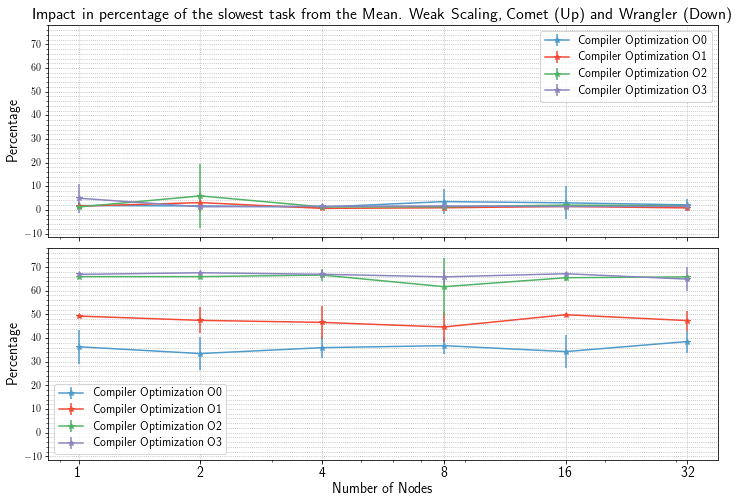

In [4]:
impactCO0 = slowest_impact(dataCO0,nodes=[1,2,4,8,16,32],center='mean')
impactCO1 = slowest_impact(dataCO1,nodes=[1,2,4,8,16,32],center='mean')
impactCO2 = slowest_impact(dataCO2,nodes=[1,2,4,8,16,32],center='mean')
impactCO3 = slowest_impact(dataCO3,nodes=[1,2,4,8,16,32],center='mean')

impactWO0 = slowest_impact(dataWO0,nodes=[1,2,4,8,16,32],center='mean')
impactWO1 = slowest_impact(dataWO1,nodes=[1,2,4,8,16,32],center='mean')
impactWO2 = slowest_impact(dataWO2,nodes=[1,2,4,8,16,32],center='mean')
impactWO3 = slowest_impact(dataWO3,nodes=[1,2,4,8,16,32],center='mean')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO0],yerr=[np.std(D)*100 for D in impactCO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO1],yerr=[np.std(D)*100 for D in impactCO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO2],yerr=[np.std(D)*100 for D in impactCO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactCO3],yerr=[np.std(D)*100 for D in impactCO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO0],yerr=[np.std(D)*100 for D in impactWO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO1],yerr=[np.std(D)*100 for D in impactWO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO2],yerr=[np.std(D)*100 for D in impactWO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)*100 for D in impactWO3],yerr=[np.std(D)*100 for D in impactWO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[0].set_ylabel('Percentage',fontsize=14)
axes[1].set_ylabel('Percentage',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Impact in percentage of the slowest task from the Mean. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


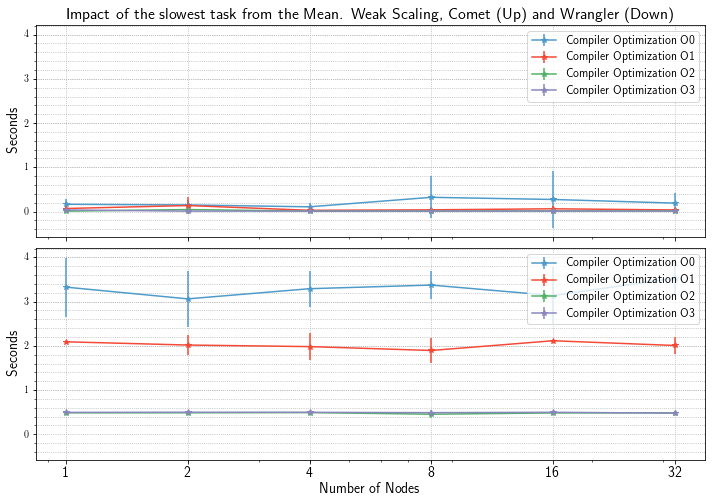

In [5]:
impactCO0 = slowest_impact(dataCO0,nodes=[1,2,4,8,16,32],center='meanabs')
impactCO1 = slowest_impact(dataCO1,nodes=[1,2,4,8,16,32],center='meanabs')
impactCO2 = slowest_impact(dataCO2,nodes=[1,2,4,8,16,32],center='meanabs')
impactCO3 = slowest_impact(dataCO3,nodes=[1,2,4,8,16,32],center='meanabs')

impactWO0 = slowest_impact(dataWO0,nodes=[1,2,4,8,16,32],center='meanabs')
impactWO1 = slowest_impact(dataWO1,nodes=[1,2,4,8,16,32],center='meanabs')
impactWO2 = slowest_impact(dataWO2,nodes=[1,2,4,8,16,32],center='meanabs')
impactWO3 = slowest_impact(dataWO3,nodes=[1,2,4,8,16,32],center='meanabs')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO0],yerr=[np.std(D) for D in impactCO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO1],yerr=[np.std(D) for D in impactCO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO2],yerr=[np.std(D) for D in impactCO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactCO3],yerr=[np.std(D) for D in impactCO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO0],yerr=[np.std(D) for D in impactWO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO1],yerr=[np.std(D) for D in impactWO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO2],yerr=[np.std(D) for D in impactWO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in impactWO3],yerr=[np.std(D) for D in impactWO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Impact of the slowest task from the Mean. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


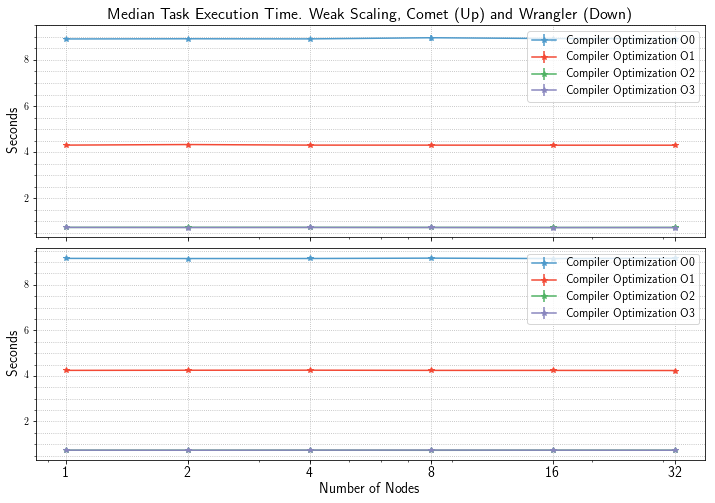

In [6]:
centersCO0 = task_centers(dataCO0,nodes=[1,2,4,8,16,32],measure='mean')
centersCO1 = task_centers(dataCO1,nodes=[1,2,4,8,16,32],measure='mean')
centersCO2 = task_centers(dataCO2,nodes=[1,2,4,8,16,32],measure='mean')
centersCO3 = task_centers(dataCO3,nodes=[1,2,4,8,16,32],measure='mean')
centersWO0 = task_centers(dataWO0,nodes=[1,2,4,8,16,32],measure='mean')
centersWO1 = task_centers(dataWO1,nodes=[1,2,4,8,16,32],measure='mean')
centersWO2 = task_centers(dataWO2,nodes=[1,2,4,8,16,32],measure='mean')
centersWO3 = task_centers(dataWO3,nodes=[1,2,4,8,16,32],measure='mean')

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=False,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO0],yerr=[np.std(D)/1000000.0 for D in centersCO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO1],yerr=[np.std(D)/1000000.0 for D in centersCO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO2],yerr=[np.std(D)/1000000.0 for D in centersCO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersCO3],yerr=[np.std(D)/1000000.0 for D in centersCO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO0],yerr=[np.std(D)/1000000.0 for D in centersWO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO1],yerr=[np.std(D)/1000000.0 for D in centersWO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO2],yerr=[np.std(D)/1000000.0 for D in centersWO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D)/1000000.0 for D in centersWO3],yerr=[np.std(D)/1000000.0 for D in centersWO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[0].set_ylabel('Seconds',fontsize=14)
axes[1].set_ylabel('Seconds',fontsize=14)
axes[1].set_xscale(value='log')
#axes[0].set_ylim([0,10])
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Median Task Execution Time. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)


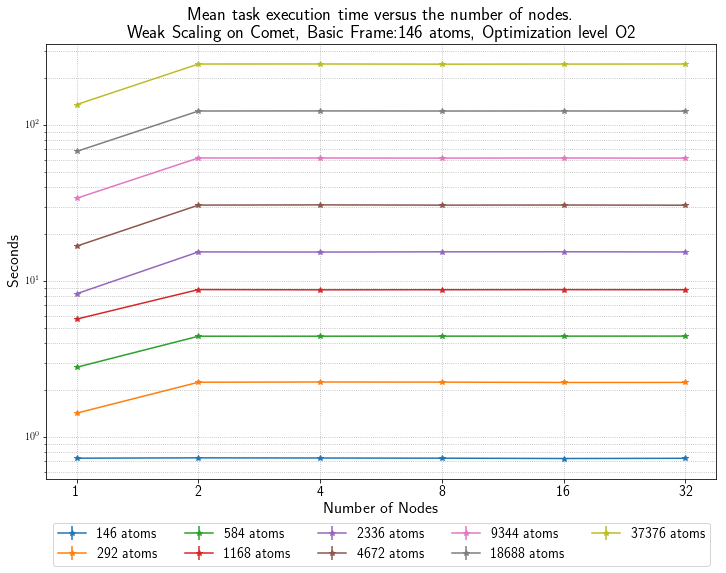

In [7]:
dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO2146 = task_centers(dataCO21,nodes=[1,2,4,8,16,32],measure='mean')

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand292.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO2292 = task_centers(dataCO21,nodes=[1,2,4,8,16,32],measure='mean')

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand584.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO2584 = task_centers(dataCO21,nodes=[1,2,4,8,16,32],measure='mean')

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand1168.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO21168 = task_centers(dataCO21,nodes=[1,2,4,8,16,32],measure='mean')

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand2336.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO22336 = task_centers(dataCO21,nodes=[1,2,4,8,16,32],measure='mean')

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand4672.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO24672 = task_centers(dataCO21,nodes=[1,2,4,8,16,32],measure='mean')

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand9344.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO29344 = task_centers(dataCO21,nodes=[1,2,4,8,16,32],measure='mean')

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand18688.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO218688 = task_centers(dataCO21,nodes=[1,2,4,8,16,32],measure='mean')

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand37376.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO237376 = task_centers(dataCO21,nodes=[1,2,4,8,16,32],measure='mean')

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=[12,8])
#axes = fig.add_subplot(111,projection='3d')
#fig,axes = plt.subplots(nrows=1,ncols=1,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05},projection='3d')
axes.errorbar([1,2,3,4,5,6],[np.mean(D)/1000000.0 for D in coeffCO2146],yerr=[np.std(D)/1000000.0 for D in coeffCO2146],label='146 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D)/1000000.0 for D in coeffCO2292],yerr=[np.std(D)/1000000.0 for D in coeffCO2292],label='292 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D)/1000000.0 for D in coeffCO2584],yerr=[np.std(D)/1000000.0 for D in coeffCO2584],label='584 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D)/1000000.0 for D in coeffCO21168],yerr=[np.std(D)/1000000.0 for D in coeffCO21168],label='1168 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D)/1000000.0 for D in coeffCO22336],yerr=[np.std(D)/1000000.0 for D in coeffCO22336],label='2336 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D)/1000000.0 for D in coeffCO24672],yerr=[np.std(D)/1000000.0 for D in coeffCO24672],label='4672 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D)/1000000.0 for D in coeffCO29344],yerr=[np.std(D)/1000000.0 for D in coeffCO29344],label='9344 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D)/1000000.0 for D in coeffCO218688],yerr=[np.std(D)/1000000.0 for D in coeffCO218688],label='18688 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D)/1000000.0 for D in coeffCO237376],yerr=[np.std(D)/1000000.0 for D in coeffCO237376],label='37376 atoms',marker='*')
axes.set_xticklabels([0,1,2,4,8,16,32],fontsize=14)
axes.set_yscale('log')
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.set_title('Mean task execution time versus the number of nodes.\nWeak Scaling on Comet, Basic Frame:146 atoms, Optimization level O2',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_ylabel('Seconds',fontsize=16)
axes.legend(fontsize=14,bbox_to_anchor=(0.,-0.2,1,0), loc='lower center',ncol=5, borderaxespad=0.)

## Average coefficient of variation

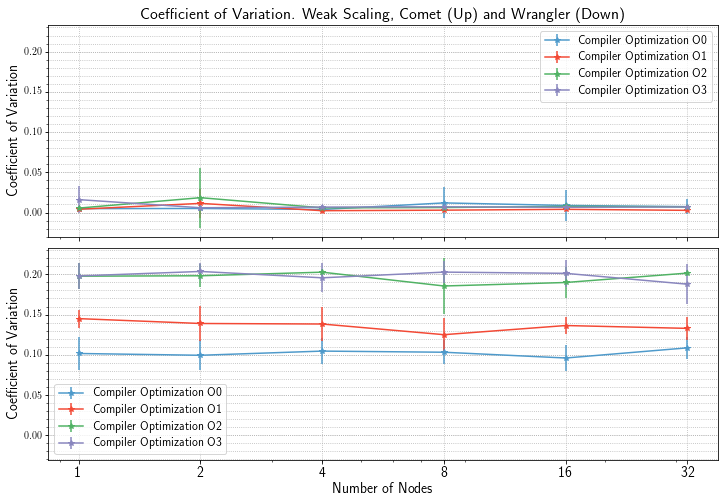

In [8]:
coeffCO0 = task_coeff(dataCO0,nodes=[1,2,4,8,16,32])
coeffCO1 = task_coeff(dataCO1,nodes=[1,2,4,8,16,32])
coeffCO2 = task_coeff(dataCO2,nodes=[1,2,4,8,16,32])
coeffCO3 = task_coeff(dataCO3,nodes=[1,2,4,8,16,32])
coeffWO0 = task_coeff(dataWO0,nodes=[1,2,4,8,16,32])
coeffWO1 = task_coeff(dataWO1,nodes=[1,2,4,8,16,32])
coeffWO2 = task_coeff(dataWO2,nodes=[1,2,4,8,16,32])
coeffWO3 = task_coeff(dataWO3,nodes=[1,2,4,8,16,32])

fig,axes = plt.subplots(nrows=2,ncols=1, sharex=True,sharey=True,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05})

axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCO0],yerr=[np.std(D) for D in coeffCO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCO1],yerr=[np.std(D) for D in coeffCO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCO2],yerr=[np.std(D) for D in coeffCO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[0].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffCO3],yerr=[np.std(D) for D in coeffCO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWO0],yerr=[np.std(D) for D in coeffWO0],color=blues(150),marker='*',label='Compiler Optimization O0')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWO1],yerr=[np.std(D) for D in coeffWO1],color=reds(150),marker='*',label='Compiler Optimization O1')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWO2],yerr=[np.std(D) for D in coeffWO2],color=greens(150),marker='*',label='Compiler Optimization O2')
axes[1].errorbar([1,2,4,8,16,32],[np.mean(D) for D in coeffWO3],yerr=[np.std(D) for D in coeffWO3],color=purples(150),marker='*',label='Compiler Optimization O3')
axes[0].set_ylabel('Coefficient of Variation',fontsize=14)
axes[1].set_ylabel('Coefficient of Variation',fontsize=14)
axes[1].set_xscale(value='log')
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[0].grid('on',linestyle=':')
axes[1].grid('on',linestyle=':')
axes[0].grid(axis='y',which='minor', linestyle=':')
axes[1].grid(axis='y',which='minor', linestyle=':')
axes[1].set_xticks([1,2,4,8,16,32])
axes[1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[1].set_xlabel('Number of Nodes',fontsize=14)
axes[0].set_title('Coefficient of Variation. Weak Scaling, Comet (Up) and Wrangler (Down)',fontsize=16)
axes[1].legend(fontsize=12)
axes[0].legend(fontsize=12)

In [9]:
dataComet = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO2146 = task_coeff(dataCO21,nodes=[1,2,4,8,16,32])

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand292.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO2292 = task_coeff(dataCO21,nodes=[1,2,4,8,16,32])

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand584.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO2584 = task_coeff(dataCO21,nodes=[1,2,4,8,16,32])

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand1168.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO21168 = task_coeff(dataCO21,nodes=[1,2,4,8,16,32])

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand2336.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO22336 = task_coeff(dataCO21,nodes=[1,2,4,8,16,32])

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand4672.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO24672 = task_coeff(dataCO21,nodes=[1,2,4,8,16,32])

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand9344.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO29344 = task_coeff(dataCO21,nodes=[1,2,4,8,16,32])

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand18688.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO218688 = task_coeff(dataCO21,nodes=[1,2,4,8,16,32])

dataComet    = pd.DataFrame.from_csv('stragglers/tidy_data/WeakScaling/UpTo32Nodes/comet_mpic++_NoIOnewRand37376.csv').drop(['Framework'],axis=1)
dataCO21 = dataComet[dataComet['Optimization']==2].drop(['Optimization'],axis=1).reset_index(drop='index')
coeffCO237376 = task_coeff(dataCO21,nodes=[1,2,4,8,16,32])


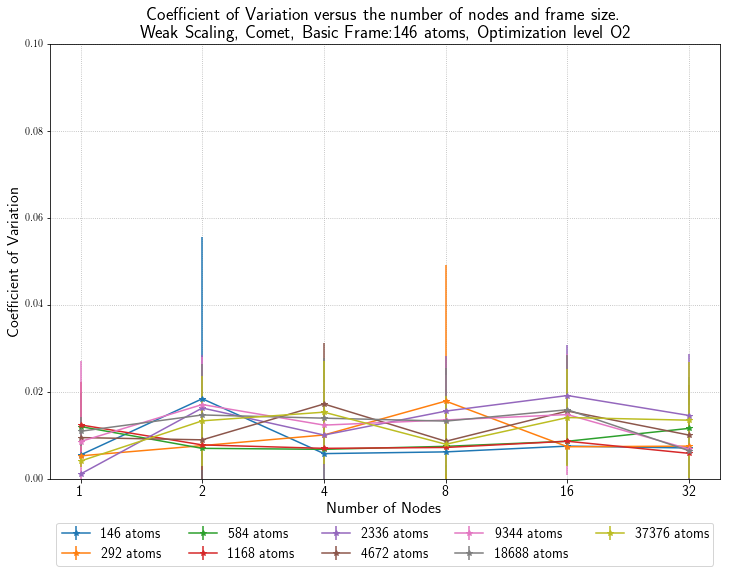

In [10]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=[12,8])
#axes = fig.add_subplot(111,projection='3d')
#fig,axes = plt.subplots(nrows=1,ncols=1,figsize=[12,8],gridspec_kw={'wspace':0.05, 'hspace':0.05},projection='3d')
axes.errorbar([1,2,3,4,5,6],[np.mean(D) for D in coeffCO2146],yerr=[np.std(D) for D in coeffCO2146],label='146 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D) for D in coeffCO2292],yerr=[np.std(D) for D in coeffCO2292],label='292 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D) for D in coeffCO2584],yerr=[np.std(D) for D in coeffCO2584],label='584 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D) for D in coeffCO21168],yerr=[np.std(D) for D in coeffCO21168],label='1168 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D) for D in coeffCO22336],yerr=[np.std(D) for D in coeffCO22336],label='2336 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D) for D in coeffCO24672],yerr=[np.std(D) for D in coeffCO24672],label='4672 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D) for D in coeffCO29344],yerr=[np.std(D) for D in coeffCO29344],label='9344 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D) for D in coeffCO218688],yerr=[np.std(D) for D in coeffCO218688],label='18688 atoms',marker='*')
axes.errorbar([1,2,3,4,5,6],[np.mean(D) for D in coeffCO237376],yerr=[np.std(D) for D in coeffCO237376],label='37376 atoms',marker='*')

axes.set_xticklabels([0,1,2,4,8,16,32],fontsize=14)
axes.set_ylim(0,0.1)
#axes.set_zticklabels([0.00,0.01,0.02,0.03,0.04,0.05],fontsize=14)
axes.set_title('Coefficient of Variation versus the number of nodes and frame size.\nWeak Scaling, Comet, Basic Frame:146 atoms, Optimization level O2',fontsize=18)
axes.set_xlabel('Number of Nodes',fontsize=16)
axes.set_ylabel('Coefficient of Variation',fontsize=16)
axes.grid('on',linestyle=':')
axes.grid(axis='y',which='minor', linestyle=':')
axes.legend(fontsize=14,bbox_to_anchor=(0.,-0.2,1,0), loc='lower center',ncol=5, borderaxespad=0.)

## Stragglers Existance

Text(0.5,-0.15,u'Probability of run having at least one straggler (L) based on compiler optimization and Fraction of straggler tasks (R)\nversus number of nodes.                  A task is considered a straggler when it is $50\\%$ from the median')

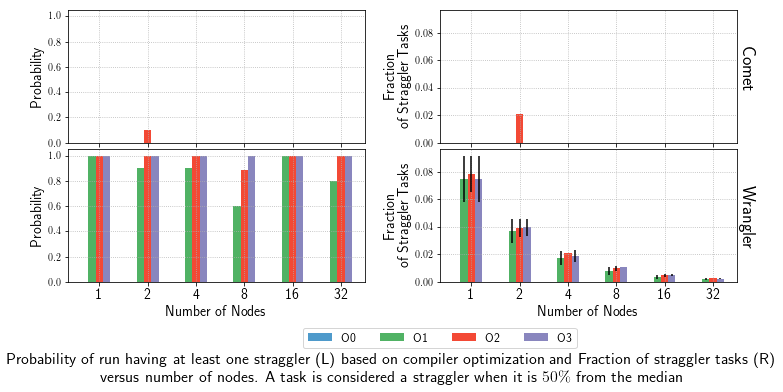

In [11]:
mult = 3
center = 'fifty'
Co0Dist,Co0S,_ = straggler_freq(dataCO0,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co1Dist,Co1S,_ = straggler_freq(dataCO1,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co2Dist,Co2S,_ = straggler_freq(dataCO2,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co3Dist,Co3S,_ = straggler_freq(dataCO3,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo0Dist,Wo0S,_ = straggler_freq(dataWO0,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo1Dist,Wo1S,_ = straggler_freq(dataWO1,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo2Dist,Wo2S,_ = straggler_freq(dataWO2,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo3Dist,Wo3S,_ = straggler_freq(dataWO3,mult=mult,nodes=[1,2,4,8,16,32],center=center)
fig,axes = plt.subplots(nrows=2,ncols=2, sharex=True,sharey='col',figsize=[12,5],gridspec_kw={'wspace':0.25, 'hspace':0.05})
x = np.arange(6)
width = 0.15
axes[0,0].bar(x-2*width,Co0S,color=blues(150),width=width,label='O0')
axes[0,0].bar(x-1*width,Co1S,color=greens(150),width=width,label='O1')
axes[0,0].bar(x+0*width,Co2S,color=reds(150),width=width,label='O2')
axes[0,0].bar(x+1*width,Co3S,color=purples(150),width=width,label='O3')
axes[1,0].bar(x-2*width,Wo0S,color=blues(150),width=width,label='O0')
axes[1,0].bar(x-1*width,Wo1S,color=greens(150),width=width,label='O1')
axes[1,0].bar(x+0*width,Wo2S,color=reds(150),width=width,label='O2')
axes[1,0].bar(x+1*width,Wo3S,color=purples(150),width=width,label='O3')
axes[0,1].bar(x-2*width,[np.mean(D) for D in Co0Dist],yerr=[np.std(D) for D in Co0Dist],color=blues(150),width=width,label='O0')
axes[0,1].bar(x-1*width,[np.mean(D) for D in Co1Dist],yerr=[np.std(D) for D in Co1Dist],color=greens(150),width=width,label='O1')
axes[0,1].bar(x+0*width,[np.mean(D) for D in Co2Dist],yerr=[np.std(D) for D in Co2Dist],color=reds(150),width=width,label='O2')
axes[0,1].bar(x+1*width,[np.mean(D) for D in Co3Dist],yerr=[np.std(D) for D in Co3Dist],color=purples(150),width=width,label='O3')
axes[1,1].bar(x-2*width,[np.mean(D) for D in Wo0Dist],yerr=[np.std(D) for D in Wo0Dist],color=blues(150),width=width,label='O0')
axes[1,1].bar(x-1*width,[np.mean(D) for D in Wo1Dist],yerr=[np.std(D) for D in Wo1Dist],color=greens(150),width=width,label='O1')
axes[1,1].bar(x+0*width,[np.mean(D) for D in Wo2Dist],yerr=[np.std(D) for D in Wo2Dist],color=reds(150),width=width,label='O2')
axes[1,1].bar(x+1*width,[np.mean(D) for D in Wo3Dist],yerr=[np.std(D) for D in Wo3Dist],color=purples(150),width=width,label='O3')
axes[0,0].grid('on',which='both',linestyle=':')
axes[1,0].grid('on',which='both',linestyle=':')
axes[1,0].set_xlabel('Number of Nodes',fontsize=14)
axes[1,0].set_xticks([0,1,2,3,4,5])
axes[1,0].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,0].set_ylabel('Probability',fontsize=14)
axes[1,0].set_ylabel('Probability',fontsize=14)
axes[0,1].grid('on',which='both',linestyle=':')
axes[1,1].grid('on',which='both',linestyle=':')
axes[1,1].set_xlabel('Number of Nodes',fontsize=14)
axes[1,1].set_xticks([0,1,2,3,4,5])
axes[1,1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[1,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[0,1].text(5.55,0.07, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].text(5.55,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].legend(['O0','O1','O2','O3'],fontsize=12,bbox_to_anchor=(0., -.5, 0,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of run having at least one straggler (L) based on compiler optimization and Fraction of straggler tasks (R)\nversus number of nodes.\
                  A task is considered a straggler when it is $50\%$ from the median', ha='center',fontsize=16)


Text(0.5,-0.15,u'Probability of run having at least one straggler (L) based on the framework and Fraction of straggler tasks (R)\nversus number of nodes.                  A task is considered a straggler when it is $3\\sigma$ from the mean')

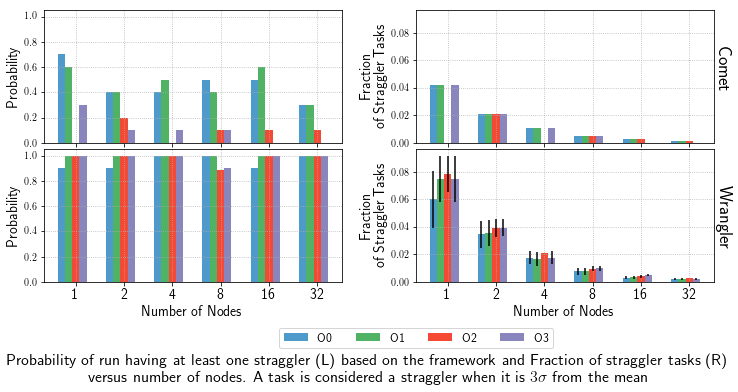

In [12]:
mult = 3
center = 'mean'
Co0Dist,Co0S,_ = straggler_freq(dataCO0,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co1Dist,Co1S,_ = straggler_freq(dataCO1,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co2Dist,Co2S,_ = straggler_freq(dataCO2,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co3Dist,Co3S,_ = straggler_freq(dataCO3,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo0Dist,Wo0S,_ = straggler_freq(dataWO0,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo1Dist,Wo1S,_ = straggler_freq(dataWO1,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo2Dist,Wo2S,_ = straggler_freq(dataWO2,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo3Dist,Wo3S,_ = straggler_freq(dataWO3,mult=mult,nodes=[1,2,4,8,16,32],center=center)
fig,axes = plt.subplots(nrows=2,ncols=2, sharex=True,sharey='col',figsize=[12,5],gridspec_kw={'wspace':0.25, 'hspace':0.05})
x = np.arange(6)
width = 0.15
axes[0,0].bar(x-2*width,Co0S,color=blues(150),width=width,label='O0')
axes[0,0].bar(x-1*width,Co1S,color=greens(150),width=width,label='O1')
axes[0,0].bar(x+0*width,Co2S,color=reds(150),width=width,label='O2')
axes[0,0].bar(x+1*width,Co3S,color=purples(150),width=width,label='O3')
axes[1,0].bar(x-2*width,Wo0S,color=blues(150),width=width,label='O0')
axes[1,0].bar(x-1*width,Wo1S,color=greens(150),width=width,label='O1')
axes[1,0].bar(x+0*width,Wo2S,color=reds(150),width=width,label='O2')
axes[1,0].bar(x+1*width,Wo3S,color=purples(150),width=width,label='O3')
axes[0,1].bar(x-2*width,[np.mean(D) for D in Co0Dist],yerr=[np.std(D) for D in Co0Dist],color=blues(150),width=width,label='O0')
axes[0,1].bar(x-1*width,[np.mean(D) for D in Co1Dist],yerr=[np.std(D) for D in Co1Dist],color=greens(150),width=width,label='O1')
axes[0,1].bar(x+0*width,[np.mean(D) for D in Co2Dist],yerr=[np.std(D) for D in Co2Dist],color=reds(150),width=width,label='O2')
axes[0,1].bar(x+1*width,[np.mean(D) for D in Co3Dist],yerr=[np.std(D) for D in Co3Dist],color=purples(150),width=width,label='O3')
axes[1,1].bar(x-2*width,[np.mean(D) for D in Wo0Dist],yerr=[np.std(D) for D in Wo0Dist],color=blues(150),width=width,label='O0')
axes[1,1].bar(x-1*width,[np.mean(D) for D in Wo1Dist],yerr=[np.std(D) for D in Wo1Dist],color=greens(150),width=width,label='O1')
axes[1,1].bar(x+0*width,[np.mean(D) for D in Wo2Dist],yerr=[np.std(D) for D in Wo2Dist],color=reds(150),width=width,label='O2')
axes[1,1].bar(x+1*width,[np.mean(D) for D in Wo3Dist],yerr=[np.std(D) for D in Wo3Dist],color=purples(150),width=width,label='O3')
axes[0,0].grid('on',which='both',linestyle=':')
axes[1,0].grid('on',which='both',linestyle=':')
axes[1,0].set_xlabel('Number of Nodes',fontsize=14)
axes[1,0].set_xticks([0,1,2,3,4,5])
axes[1,0].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,0].set_ylabel('Probability',fontsize=14)
axes[1,0].set_ylabel('Probability',fontsize=14)
axes[0,1].grid('on',which='both',linestyle=':')
axes[1,1].grid('on',which='both',linestyle=':')
axes[1,1].set_xlabel('Number of Nodes',fontsize=14)
axes[1,1].set_xticks([0,1,2,3,4,5])
axes[1,1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[1,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[0,1].text(5.55,0.07, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].text(5.55,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].legend(['O0','O1','O2','O3'],fontsize=12,bbox_to_anchor=(0., -.5, 0,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of run having at least one straggler (L) based on the framework and Fraction of straggler tasks (R)\nversus number of nodes.\
                  A task is considered a straggler when it is $3\sigma$ from the mean', ha='center',fontsize=16)


Text(0.5,-0.15,u'Probability of run having at least one straggler (L) based on the framework and Fraction of straggler tasks (R)\nversus number of nodes.                  A task is considered a straggler when it is $2\\sigma$ from the mean')

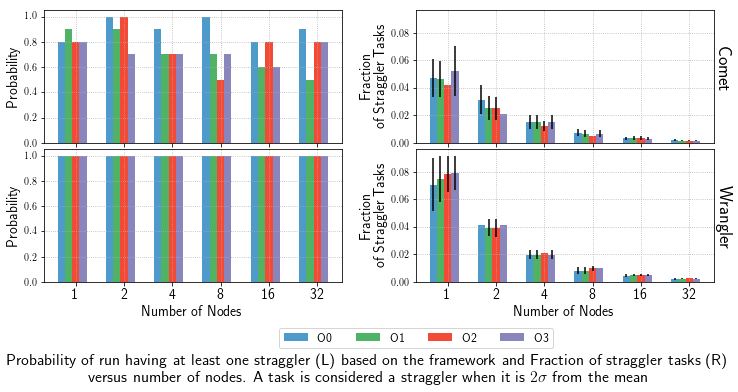

In [13]:
mult = 2
center = 'mean'
Co0Dist,Co0S,_ = straggler_freq(dataCO0,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co1Dist,Co1S,_ = straggler_freq(dataCO1,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co2Dist,Co2S,_ = straggler_freq(dataCO2,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co3Dist,Co3S,_ = straggler_freq(dataCO3,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo0Dist,Wo0S,_ = straggler_freq(dataWO0,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo1Dist,Wo1S,_ = straggler_freq(dataWO1,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo2Dist,Wo2S,_ = straggler_freq(dataWO2,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo3Dist,Wo3S,_ = straggler_freq(dataWO3,mult=mult,nodes=[1,2,4,8,16,32],center=center)
fig,axes = plt.subplots(nrows=2,ncols=2, sharex=True,sharey='col',figsize=[12,5],gridspec_kw={'wspace':0.25, 'hspace':0.05})
x = np.arange(6)
width = 0.15
axes[0,0].bar(x-2*width,Co0S,color=blues(150),width=width,label='O0')
axes[0,0].bar(x-1*width,Co1S,color=greens(150),width=width,label='O1')
axes[0,0].bar(x+0*width,Co2S,color=reds(150),width=width,label='O2')
axes[0,0].bar(x+1*width,Co3S,color=purples(150),width=width,label='O3')
axes[1,0].bar(x-2*width,Wo0S,color=blues(150),width=width,label='O0')
axes[1,0].bar(x-1*width,Wo1S,color=greens(150),width=width,label='O1')
axes[1,0].bar(x+0*width,Wo2S,color=reds(150),width=width,label='O2')
axes[1,0].bar(x+1*width,Wo3S,color=purples(150),width=width,label='O3')
axes[0,1].bar(x-2*width,[np.mean(D) for D in Co0Dist],yerr=[np.std(D) for D in Co0Dist],color=blues(150),width=width,label='O0')
axes[0,1].bar(x-1*width,[np.mean(D) for D in Co1Dist],yerr=[np.std(D) for D in Co1Dist],color=greens(150),width=width,label='O1')
axes[0,1].bar(x+0*width,[np.mean(D) for D in Co2Dist],yerr=[np.std(D) for D in Co2Dist],color=reds(150),width=width,label='O2')
axes[0,1].bar(x+1*width,[np.mean(D) for D in Co3Dist],yerr=[np.std(D) for D in Co3Dist],color=purples(150),width=width,label='O3')
axes[1,1].bar(x-2*width,[np.mean(D) for D in Wo0Dist],yerr=[np.std(D) for D in Wo0Dist],color=blues(150),width=width,label='O0')
axes[1,1].bar(x-1*width,[np.mean(D) for D in Wo1Dist],yerr=[np.std(D) for D in Wo1Dist],color=greens(150),width=width,label='O1')
axes[1,1].bar(x+0*width,[np.mean(D) for D in Wo2Dist],yerr=[np.std(D) for D in Wo2Dist],color=reds(150),width=width,label='O2')
axes[1,1].bar(x+1*width,[np.mean(D) for D in Wo3Dist],yerr=[np.std(D) for D in Wo3Dist],color=purples(150),width=width,label='O3')
axes[0,0].grid('on',which='both',linestyle=':')
axes[1,0].grid('on',which='both',linestyle=':')
axes[1,0].set_xlabel('Number of Nodes',fontsize=14)
axes[1,0].set_xticks([0,1,2,3,4,5])
axes[1,0].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,0].set_ylabel('Probability',fontsize=14)
axes[1,0].set_ylabel('Probability',fontsize=14)
axes[0,1].grid('on',which='both',linestyle=':')
axes[1,1].grid('on',which='both',linestyle=':')
axes[1,1].set_xlabel('Number of Nodes',fontsize=14)
axes[1,1].set_xticks([0,1,2,3,4,5])
axes[1,1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[1,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[0,1].text(5.55,0.07, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].text(5.55,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].legend(['O0','O1','O2','O3'],fontsize=12,bbox_to_anchor=(0., -.5, 0,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of run having at least one straggler (L) based on the framework and Fraction of straggler tasks (R)\nversus number of nodes.\
                  A task is considered a straggler when it is $2\sigma$ from the mean', ha='center',fontsize=16)

Text(0.5,-0.15,u'Probability of run having at least one straggler (L) based on the framework and Fraction of straggler tasks (R)\nversus number of nodes.                  A task is considered a straggler when it is $3\\sigma$ from the median')

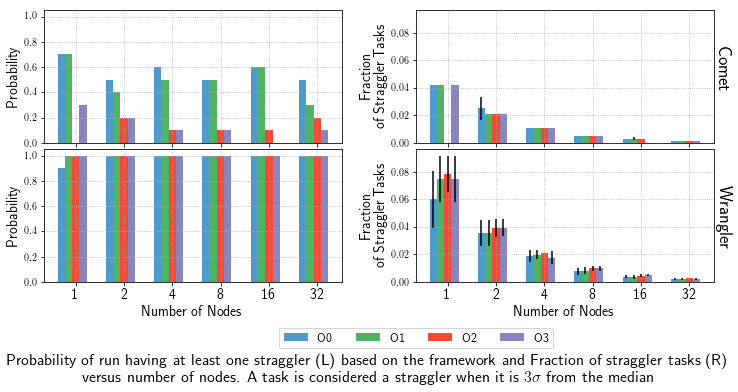

In [14]:
mult = 3
center = 'median'
Co0Dist,Co0S,_ = straggler_freq(dataCO0,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co1Dist,Co1S,_ = straggler_freq(dataCO1,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co2Dist,Co2S,_ = straggler_freq(dataCO2,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co3Dist,Co3S,_ = straggler_freq(dataCO3,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo0Dist,Wo0S,_ = straggler_freq(dataWO0,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo1Dist,Wo1S,_ = straggler_freq(dataWO1,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo2Dist,Wo2S,_ = straggler_freq(dataWO2,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo3Dist,Wo3S,_ = straggler_freq(dataWO3,mult=mult,nodes=[1,2,4,8,16,32],center=center)
fig,axes = plt.subplots(nrows=2,ncols=2, sharex=True,sharey='col',figsize=[12,5],gridspec_kw={'wspace':0.25, 'hspace':0.05})
x = np.arange(6)
width = 0.15
axes[0,0].bar(x-2*width,Co0S,color=blues(150),width=width,label='O0')
axes[0,0].bar(x-1*width,Co1S,color=greens(150),width=width,label='O1')
axes[0,0].bar(x+0*width,Co2S,color=reds(150),width=width,label='O2')
axes[0,0].bar(x+1*width,Co3S,color=purples(150),width=width,label='O3')
axes[1,0].bar(x-2*width,Wo0S,color=blues(150),width=width,label='O0')
axes[1,0].bar(x-1*width,Wo1S,color=greens(150),width=width,label='O1')
axes[1,0].bar(x+0*width,Wo2S,color=reds(150),width=width,label='O2')
axes[1,0].bar(x+1*width,Wo3S,color=purples(150),width=width,label='O3')
axes[0,1].bar(x-2*width,[np.mean(D) for D in Co0Dist],yerr=[np.std(D) for D in Co0Dist],color=blues(150),width=width,label='O0')
axes[0,1].bar(x-1*width,[np.mean(D) for D in Co1Dist],yerr=[np.std(D) for D in Co1Dist],color=greens(150),width=width,label='O1')
axes[0,1].bar(x+0*width,[np.mean(D) for D in Co2Dist],yerr=[np.std(D) for D in Co2Dist],color=reds(150),width=width,label='O2')
axes[0,1].bar(x+1*width,[np.mean(D) for D in Co3Dist],yerr=[np.std(D) for D in Co3Dist],color=purples(150),width=width,label='O3')
axes[1,1].bar(x-2*width,[np.mean(D) for D in Wo0Dist],yerr=[np.std(D) for D in Wo0Dist],color=blues(150),width=width,label='O0')
axes[1,1].bar(x-1*width,[np.mean(D) for D in Wo1Dist],yerr=[np.std(D) for D in Wo1Dist],color=greens(150),width=width,label='O1')
axes[1,1].bar(x+0*width,[np.mean(D) for D in Wo2Dist],yerr=[np.std(D) for D in Wo2Dist],color=reds(150),width=width,label='O2')
axes[1,1].bar(x+1*width,[np.mean(D) for D in Wo3Dist],yerr=[np.std(D) for D in Wo3Dist],color=purples(150),width=width,label='O3')
axes[0,0].grid('on',which='both',linestyle=':')
axes[1,0].grid('on',which='both',linestyle=':')
axes[1,0].set_xlabel('Number of Nodes',fontsize=14)
axes[1,0].set_xticks([0,1,2,3,4,5])
axes[1,0].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,0].set_ylabel('Probability',fontsize=14)
axes[1,0].set_ylabel('Probability',fontsize=14)
axes[0,1].grid('on',which='both',linestyle=':')
axes[1,1].grid('on',which='both',linestyle=':')
axes[1,1].set_xlabel('Number of Nodes',fontsize=14)
axes[1,1].set_xticks([0,1,2,3,4,5])
axes[1,1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[1,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[0,1].text(5.55,0.07, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].text(5.55,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].legend(['O0','O1','O2','O3'],fontsize=12,bbox_to_anchor=(0., -.5, 0,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of run having at least one straggler (L) based on the framework and Fraction of straggler tasks (R)\nversus number of nodes.\
                  A task is considered a straggler when it is $3\sigma$ from the median', ha='center',fontsize=16)

Text(0.5,-0.15,u'Probability of run having at least one straggler (L) based on the framework and Fraction of straggler tasks (R)\nversus number of nodes.                  A task is considered a straggler when it is $2\\sigma$ from the median')

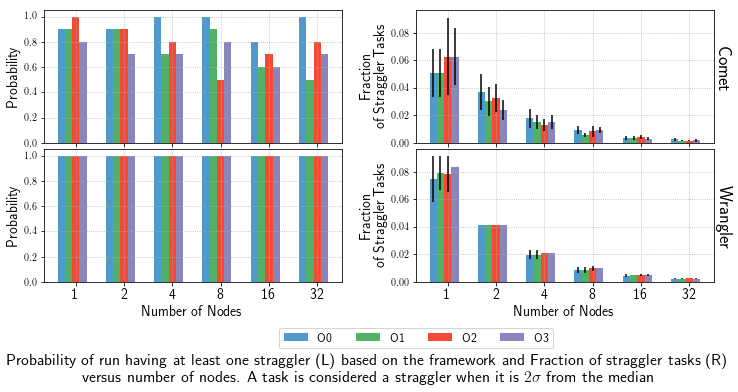

In [15]:
mult = 2
center = 'median'
Co0Dist,Co0S,_ = straggler_freq(dataCO0,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co1Dist,Co1S,_ = straggler_freq(dataCO1,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co2Dist,Co2S,_ = straggler_freq(dataCO2,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Co3Dist,Co3S,_ = straggler_freq(dataCO3,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo0Dist,Wo0S,_ = straggler_freq(dataWO0,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo1Dist,Wo1S,_ = straggler_freq(dataWO1,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo2Dist,Wo2S,_ = straggler_freq(dataWO2,mult=mult,nodes=[1,2,4,8,16,32],center=center)
Wo3Dist,Wo3S,_ = straggler_freq(dataWO3,mult=mult,nodes=[1,2,4,8,16,32],center=center)
fig,axes = plt.subplots(nrows=2,ncols=2, sharex=True,sharey='col',figsize=[12,5],gridspec_kw={'wspace':0.25, 'hspace':0.05})
x = np.arange(6)
width = 0.15
axes[0,0].bar(x-2*width,Co0S,color=blues(150),width=width,label='O0')
axes[0,0].bar(x-1*width,Co1S,color=greens(150),width=width,label='O1')
axes[0,0].bar(x+0*width,Co2S,color=reds(150),width=width,label='O2')
axes[0,0].bar(x+1*width,Co3S,color=purples(150),width=width,label='O3')
axes[1,0].bar(x-2*width,Wo0S,color=blues(150),width=width,label='O0')
axes[1,0].bar(x-1*width,Wo1S,color=greens(150),width=width,label='O1')
axes[1,0].bar(x+0*width,Wo2S,color=reds(150),width=width,label='O2')
axes[1,0].bar(x+1*width,Wo3S,color=purples(150),width=width,label='O3')
axes[0,1].bar(x-2*width,[np.mean(D) for D in Co0Dist],yerr=[np.std(D) for D in Co0Dist],color=blues(150),width=width,label='O0')
axes[0,1].bar(x-1*width,[np.mean(D) for D in Co1Dist],yerr=[np.std(D) for D in Co1Dist],color=greens(150),width=width,label='O1')
axes[0,1].bar(x+0*width,[np.mean(D) for D in Co2Dist],yerr=[np.std(D) for D in Co2Dist],color=reds(150),width=width,label='O2')
axes[0,1].bar(x+1*width,[np.mean(D) for D in Co3Dist],yerr=[np.std(D) for D in Co3Dist],color=purples(150),width=width,label='O3')
axes[1,1].bar(x-2*width,[np.mean(D) for D in Wo0Dist],yerr=[np.std(D) for D in Wo0Dist],color=blues(150),width=width,label='O0')
axes[1,1].bar(x-1*width,[np.mean(D) for D in Wo1Dist],yerr=[np.std(D) for D in Wo1Dist],color=greens(150),width=width,label='O1')
axes[1,1].bar(x+0*width,[np.mean(D) for D in Wo2Dist],yerr=[np.std(D) for D in Wo2Dist],color=reds(150),width=width,label='O2')
axes[1,1].bar(x+1*width,[np.mean(D) for D in Wo3Dist],yerr=[np.std(D) for D in Wo3Dist],color=purples(150),width=width,label='O3')
axes[0,0].grid('on',which='both',linestyle=':')
axes[1,0].grid('on',which='both',linestyle=':')
axes[1,0].set_xlabel('Number of Nodes',fontsize=14)
axes[1,0].set_xticks([0,1,2,3,4,5])
axes[1,0].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,0].set_ylabel('Probability',fontsize=14)
axes[1,0].set_ylabel('Probability',fontsize=14)
axes[0,1].grid('on',which='both',linestyle=':')
axes[1,1].grid('on',which='both',linestyle=':')
axes[1,1].set_xlabel('Number of Nodes',fontsize=14)
axes[1,1].set_xticks([0,1,2,3,4,5])
axes[1,1].set_xticklabels(['1','2','4','8','16','32'],fontsize=14)
axes[0,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[1,1].set_ylabel('Fraction\nof Straggler Tasks',fontsize=14)
axes[0,1].text(5.55,0.07, 'Comet',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].text(5.55,.07, 'Wrangler',fontsize=18,bbox={'facecolor':'grey', 'alpha':0, 'pad':8},horizontalalignment='left',verticalalignment='top',rotation=270)
axes[1,1].legend(['O0','O1','O2','O3'],fontsize=12,bbox_to_anchor=(0., -.5, 0,0), loc='lower center',ncol=5, borderaxespad=0.)
fig.text(.5, -.15, 'Probability of run having at least one straggler (L) based on the framework and Fraction of straggler tasks (R)\nversus number of nodes.\
                  A task is considered a straggler when it is $2\sigma$ from the median', ha='center',fontsize=16)